In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from prophet as Prophet 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Python
df = pd.read_excel('D:\实习文件\GL\经济周期\货币供应量(月).xls',skiprows=1).iloc[1:]
print(df.columns)
df.columns=['date','m2_pct12','m2','social_finance_pct12','social_finance','money_input','plant_profit_pct12','plant_profit']
df=df.replace(0,np.nan).fillna(method='ffill').set_index(['date'])
df['ym']=[i.year*100+i.month for i in df.index]
dfm=df.groupby(['ym']).mean()
dfm['money_input_pct12']=dfm['money_input'].pct_change(12)
dfm_pct12=dfm[['m2_pct12','social_finance_pct12','money_input_pct12','plant_profit_pct12']]

Index(['指标名称', 'M2:同比', 'M2:初值', '社会融资规模存量:同比', '社会融资规模:当月值', '公开市场操作:货币净投放',
       '工业企业:利润总额:当月同比', '工业企业:利润总额:当月值'],
      dtype='object')


In [3]:
ratedf=pd.read_excel('D:\实习文件\GL\经济周期\金融机构人民币贷款平均利率(季).xls',skiprows=1).iloc[1:]
print(ratedf.columns)
ratedf.columns=['date','loan_avg_rate','private_finance','interbank','bank_repo','10y_bond','first_morgage_pct12','first_morgage','BCI']
ratedf=ratedf.replace(0,np.nan).fillna(method='ffill').set_index(['date'])

ratedf['ym']=[i.year*100+i.month for i in ratedf.index]
ratedf_m=ratedf.groupby(['ym']).mean()

name_list=[name for name in ratedf.columns if name not in ['first_morgage_pct12','ym']]
ratedf_m_pct=ratedf_m[name_list].pct_change(12)
ratedf_m_pct.columns=[f'{i}_pct12' for i in ratedf_m_pct.columns]
ratedf_m_pct=pd.concat([ratedf_m_pct,ratedf_m['first_morgage_pct12']],axis=1)

Index(['指标名称', '金融机构人民币贷款加权平均利率', '温州指数:温州地区民间融资综合利率', '银行间同业拆借加权利率:7天',
       '银行间质押式回购加权利率:7天', '10年期国债收益率', '全国首套房贷平均利率:同比', '首套平均房贷利率',
       'BCI:企业融资环境指数'],
      dtype='object')


In [4]:
df_pct12=pd.concat([dfm_pct12,ratedf_m_pct],axis=1)
df_pct12.dropna()

,m2_pct12,social_finance_pct12,money_input_pct12,plant_profit_pct12,loan_avg_rate_pct12,private_finance_pct12,interbank_pct12,bank_repo_pct12,10y_bond_pct12,first_morgage_pct12,BCI_pct12,first_morgage_pct12
ym,,,,,,,,,,,,
201601,13.416667,12.516667,4.828125,-4.700000,-0.221566,-0.055144,-0.386065,-0.380673,-0.197670,-0.242291,0.111424,-1.480000
201602,13.860000,13.020000,-13.000000,-4.700000,-0.221566,-0.057168,-0.470429,-0.479630,-0.154161,-0.242945,0.053008,-1.476111
201603,13.320000,12.840000,1.955665,-1.540000,-0.220660,-0.035459,-0.476733,-0.450653,-0.177461,-0.234346,0.139353,-1.401739
201604,13.300000,13.350000,0.153846,9.950000,-0.201220,-0.052661,-0.200519,-0.142134,-0.180924,-0.211841,0.145479,-1.220000
201605,12.600000,13.000000,0.400000,4.100000,-0.201220,-0.067379,0.070129,0.151019,-0.157725,-0.210960,0.064286,-1.208095
...,...,...,...,...,...,...,...,...,...,...,...,...
202108,8.280000,10.620000,-0.833333,15.140000,-0.025692,-0.057857,-0.054497,-0.059116,-0.045697,0.013400,-0.080875,0.010000
202109,8.220000,10.240000,0.215517,11.340000,-0.025565,-0.004937,-0.039156,-0.010752,-0.079893,0.015322,-0.113727,0.010000
202110,8.366667,10.000000,-5.500000,17.683333,-0.023438,-0.006070,-0.088975,-0.131626,-0.072678,0.017176,-0.128295,0.010000


array([<AxesSubplot:xlabel='ym'>, <AxesSubplot:xlabel='ym'>,
       <AxesSubplot:xlabel='ym'>, <AxesSubplot:xlabel='ym'>,
       <AxesSubplot:xlabel='ym'>, <AxesSubplot:xlabel='ym'>,
       <AxesSubplot:xlabel='ym'>, <AxesSubplot:xlabel='ym'>,
       <AxesSubplot:xlabel='ym'>, <AxesSubplot:xlabel='ym'>,
       <AxesSubplot:xlabel='ym'>, <AxesSubplot:xlabel='ym'>], dtype=object)

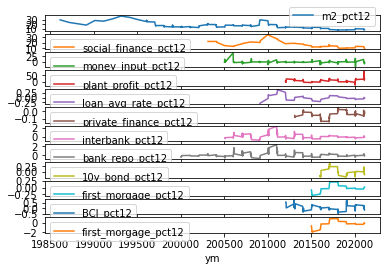

In [5]:

df_pct12.plot(subplots=True)

In [20]:
total=(df_pct12-df_pct12.mean())/df_pct12.std()
total=total.dropna()#fillna(0)

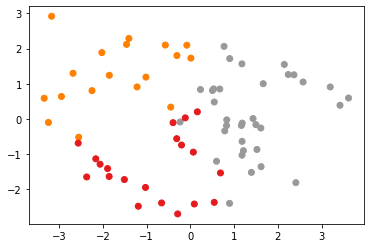

In [21]:
pca=PCA()
x_reduced=pca.fit_transform(total)
kmeans=KMeans(n_clusters=3).fit(x_reduced)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=kmeans.labels_,cmap=plt.cm.Set1)

In [24]:
x_reduced.shape

(72, 12)

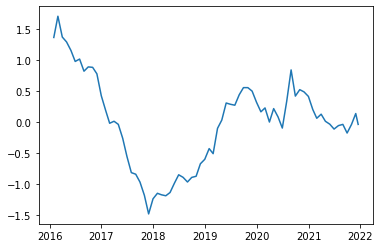

In [25]:
weight=pca.explained_variance_ratio_

date_list=df.reset_index().groupby(['ym'])['date'].last().values[-x_reduced.shape[0]:]
num=(np.cumsum(weight)<0.8).sum()+1
plt.plot(date_list,(x_reduced*weight)[:,:num].sum(axis=1))